In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print(files)

['BACTERIA-25-S19_bracken', 'BACTERIA-26-S20_bracken', 'bacteria_core.csv', 'bracken-Copy1.ipynb', 'Soil-1-S5_bracken', 'Soil-10-S14_bracken', 'Soil-11-S15_bracken', 'Soil-12-S16_bracken', 'Soil-13-S17_bracken', 'Soil-14-S18_bracken', 'Soil-2-S6_bracken', 'Soil-22-S1_bracken', 'Soil-23-S2_bracken', 'Soil-24-S3_bracken', 'Soil-3-S7_bracken', 'Soil-4-S8_bracken', 'Soil-5-S9_bracken', 'Soil-6-S10_bracken', 'Soil-7-S11_bracken', 'Soil-8-S12_bracken', 'Soil-9-S13_bracken']


In [3]:
rm = ['bracken-Copy1.ipynb','bacteria_core.csv']
for i in rm:
    if i in files:
        files.remove(i)

In [4]:
files

['BACTERIA-25-S19_bracken',
 'BACTERIA-26-S20_bracken',
 'Soil-1-S5_bracken',
 'Soil-10-S14_bracken',
 'Soil-11-S15_bracken',
 'Soil-12-S16_bracken',
 'Soil-13-S17_bracken',
 'Soil-14-S18_bracken',
 'Soil-2-S6_bracken',
 'Soil-22-S1_bracken',
 'Soil-23-S2_bracken',
 'Soil-24-S3_bracken',
 'Soil-3-S7_bracken',
 'Soil-4-S8_bracken',
 'Soil-5-S9_bracken',
 'Soil-6-S10_bracken',
 'Soil-7-S11_bracken',
 'Soil-8-S12_bracken',
 'Soil-9-S13_bracken']

In [5]:
import pandas as pd

# Initialize a dictionary to hold DataFrames
dataframes = {}

for i in files:
    # Remove '_bracken' from the filename to create a new file_name
    file_name = i.replace("_bracken", "")
    
    # Read the CSV file into a DataFrame, assuming it's tab-separated
    df = pd.read_csv(i, sep="\t")
    
    # Drop the specified columns, ensure to use the correct syntax
    df.drop(columns=["taxonomy_lvl", "kraken_assigned_reads", "added_reads", "fraction_total_reads"], inplace=True)
    
    # Rename the column 'new_est_reads' to the file_name, using correct syntax
    df.rename(columns={"new_est_reads": file_name}, inplace=True)
    
    # Store the DataFrame in the dictionary with a dynamic key
    dataframes[file_name + "_df"] = df.copy()
    

In [6]:
import pandas as pd

# Initialize an empty DataFrame with the necessary columns
merged_df = pd.DataFrame(columns=["taxonomy_id", "name"])

# Merge the first DataFrame with the initial empty DataFrame
merged_df = pd.merge(merged_df, dataframes['BACTERIA-25-S19_df'], on=["taxonomy_id", "name"], how="right")
merged_df.fillna(0, inplace=True)

# Iterate over the DataFrames in the dictionary and merge them
for key in dataframes.keys():
    if key != 'BACTERIA-25-S19_df':
        df = dataframes[key]
        # Merge the current DataFrame with the accumulated merged_df
        merged_df = pd.merge(merged_df, df, on=["taxonomy_id", "name"], how="right")
        merged_df.fillna(0, inplace=True)

# Display the final merged DataFram
merged_df

,name,taxonomy_id,BACTERIA-25-S19,BACTERIA-26-S20,Soil-1-S5,Soil-10-S14,Soil-11-S15,Soil-12-S16,Soil-13-S17,Soil-14-S18,...,Soil-22-S1,Soil-23-S2,Soil-24-S3,Soil-3-S7,Soil-4-S8,Soil-5-S9,Soil-6-S10,Soil-7-S11,Soil-8-S12,Soil-9-S13
0,Faecalibaculum,1729679,0.0,0.0,110.0,96.0,95.0,70.0,75.0,292.0,...,74.0,117.0,96.0,146.0,125.0,86.0,135.0,123.0,128.0,143
1,Euhalothece,65097,0.0,0.0,117.0,64.0,283.0,221.0,84.0,189.0,...,35.0,34.0,14.0,158.0,82.0,89.0,116.0,109.0,68.0,54
2,Marinilongibacter,2975149,0.0,0.0,77.0,81.0,78.0,58.0,71.0,200.0,...,48.0,71.0,54.0,86.0,136.0,114.0,184.0,97.0,104.0,103
3,Cetobacterium,180162,0.0,0.0,117.0,173.0,117.0,142.0,124.0,244.0,...,42.0,29.0,27.0,146.0,118.0,70.0,89.0,156.0,127.0,148
4,Franconibacter,1649295,1466.0,2302.0,390.0,290.0,312.0,272.0,527.0,1008.0,...,280.0,404.0,255.0,377.0,474.0,308.0,384.0,285.0,699.0,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,Arcobacter,28196,0.0,0.0,549.0,1043.0,932.0,658.0,688.0,1039.0,...,109.0,157.0,109.0,832.0,713.0,410.0,520.0,995.0,561.0,743
2442,Formosa,225842,0.0,0.0,236.0,338.0,217.0,188.0,233.0,429.0,...,91.0,110.0,102.0,224.0,265.0,268.0,488.0,273.0,230.0,256
2443,Chelatococcus,28209,0.0,0.0,16597.0,9465.0,9138.0,8735.0,8022.0,25726.0,...,6694.0,8642.0,7162.0,12269.0,10062.0,6728.0,6559.0,12171.0,11858.0,11048
2444,Moraxella,475,16.0,27.0,680.0,745.0,671.0,583.0,653.0,1525.0,...,452.0,581.0,503.0,886.0,793.0,551.0,716.0,953.0,782.0,787


In [7]:
import pandas as pd

# Copy the merged DataFrame
top = merged_df.copy()


top["sum"] = top.iloc[:, 2:21].sum(axis=1)

# Sort the DataFrame based on the "sum" column in descending order
top = top.sort_values(by="sum", ascending=False)

# Drop the "sum" column as it's no longer needed
top.drop(columns="sum", inplace=True)

# Reset the index of the DataFrame
top.reset_index(drop=True, inplace=True)

# Display the final DataFrame
top.head(20)


,name,taxonomy_id,BACTERIA-25-S19,BACTERIA-26-S20,Soil-1-S5,Soil-10-S14,Soil-11-S15,Soil-12-S16,Soil-13-S17,Soil-14-S18,...,Soil-22-S1,Soil-23-S2,Soil-24-S3,Soil-3-S7,Soil-4-S8,Soil-5-S9,Soil-6-S10,Soil-7-S11,Soil-8-S12,Soil-9-S13
0,Enterobacter,547,7337103.0,20152370.0,76243.0,339219.0,108897.0,57488.0,649729.0,1643825.0,...,18956.0,28190.0,21570.0,75521.0,889397.0,3462909.0,6791736.0,47376.0,114702.0,131267
1,Serratia,613,40349732.0,49809.0,12232.0,12683.0,11259.0,9424.0,13848.0,27932.0,...,9361.0,13242.0,10393.0,14092.0,11443.0,9180.0,12092.0,12436.0,13021.0,12855
2,Alcaligenes,507,38714942.0,174392.0,3074.0,2202.0,2423.0,2193.0,1676.0,4891.0,...,2511.0,3676.0,2887.0,3361.0,2197.0,1771.0,2374.0,3058.0,3079.0,3183
3,Pseudomonas,286,15957.0,34761.0,321042.0,234443.0,281211.0,242763.0,1610495.0,6311568.0,...,193383.0,261786.0,205995.0,367424.0,4944170.0,4477030.0,9067239.0,288893.0,556624.0,613554
4,Streptomyces,1883,1529.0,1011.0,1844875.0,1488214.0,1597383.0,1491533.0,1551159.0,4624410.0,...,1054298.0,1518551.0,1120746.0,2093347.0,1545030.0,1049410.0,1072104.0,1959253.0,1775046.0,1698067
5,Aeromonas,642,732.0,285.0,67186.0,67897.0,102584.0,98575.0,2131984.0,9976599.0,...,19884.0,27335.0,22494.0,60949.0,872753.0,189961.0,382883.0,39965.0,115645.0,140444
6,Nocardioides,1839,66.0,13.0,662000.0,442943.0,455969.0,410302.0,401234.0,1251640.0,...,184958.0,374694.0,217438.0,617924.0,392056.0,250317.0,204262.0,481309.0,397257.0,370712
7,Micromonospora,1873,190.0,40.0,403369.0,370035.0,391415.0,385874.0,346730.0,1069251.0,...,221417.0,249741.0,214715.0,480672.0,365503.0,195141.0,174683.0,788061.0,438590.0,412708
8,Bacillus,1386,144591.0,4385875.0,131498.0,123892.0,127734.0,114008.0,97290.0,204694.0,...,73440.0,95456.0,74984.0,173517.0,198889.0,27775.0,30112.0,192359.0,151648.0,160659
9,Bradyrhizobium,374,89.0,114.0,311474.0,350459.0,274155.0,244172.0,284799.0,898711.0,...,236454.0,280866.0,232319.0,406427.0,339530.0,214515.0,221123.0,353698.0,402584.0,382984


In [8]:
# Drop the "taxonomy_id" column
hmdf = top.drop(columns="taxonomy_id")

# Rename the "name" column to "taxa"
hmdf.rename(columns={"name": "taxa"}, inplace=True)

# Set the "taxa" column as the index and drop it from the DataFrame
hmdf.set_index("taxa", drop=True, inplace=True)
hmdf

,BACTERIA-25-S19,BACTERIA-26-S20,Soil-1-S5,Soil-10-S14,Soil-11-S15,Soil-12-S16,Soil-13-S17,Soil-14-S18,Soil-2-S6,Soil-22-S1,Soil-23-S2,Soil-24-S3,Soil-3-S7,Soil-4-S8,Soil-5-S9,Soil-6-S10,Soil-7-S11,Soil-8-S12,Soil-9-S13
taxa,,,,,,,,,,,,,,,,,,,
Enterobacter,7337103.0,20152370.0,76243.0,339219.0,108897.0,57488.0,649729.0,1643825.0,1209422.0,18956.0,28190.0,21570.0,75521.0,889397.0,3462909.0,6791736.0,47376.0,114702.0,131267
Serratia,40349732.0,49809.0,12232.0,12683.0,11259.0,9424.0,13848.0,27932.0,12917.0,9361.0,13242.0,10393.0,14092.0,11443.0,9180.0,12092.0,12436.0,13021.0,12855
Alcaligenes,38714942.0,174392.0,3074.0,2202.0,2423.0,2193.0,1676.0,4891.0,2426.0,2511.0,3676.0,2887.0,3361.0,2197.0,1771.0,2374.0,3058.0,3079.0,3183
Pseudomonas,15957.0,34761.0,321042.0,234443.0,281211.0,242763.0,1610495.0,6311568.0,2050569.0,193383.0,261786.0,205995.0,367424.0,4944170.0,4477030.0,9067239.0,288893.0,556624.0,613554
Streptomyces,1529.0,1011.0,1844875.0,1488214.0,1597383.0,1491533.0,1551159.0,4624410.0,1755895.0,1054298.0,1518551.0,1120746.0,2093347.0,1545030.0,1049410.0,1072104.0,1959253.0,1775046.0,1698067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pharaohvirus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
Galaxyvirus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
Coralvirus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


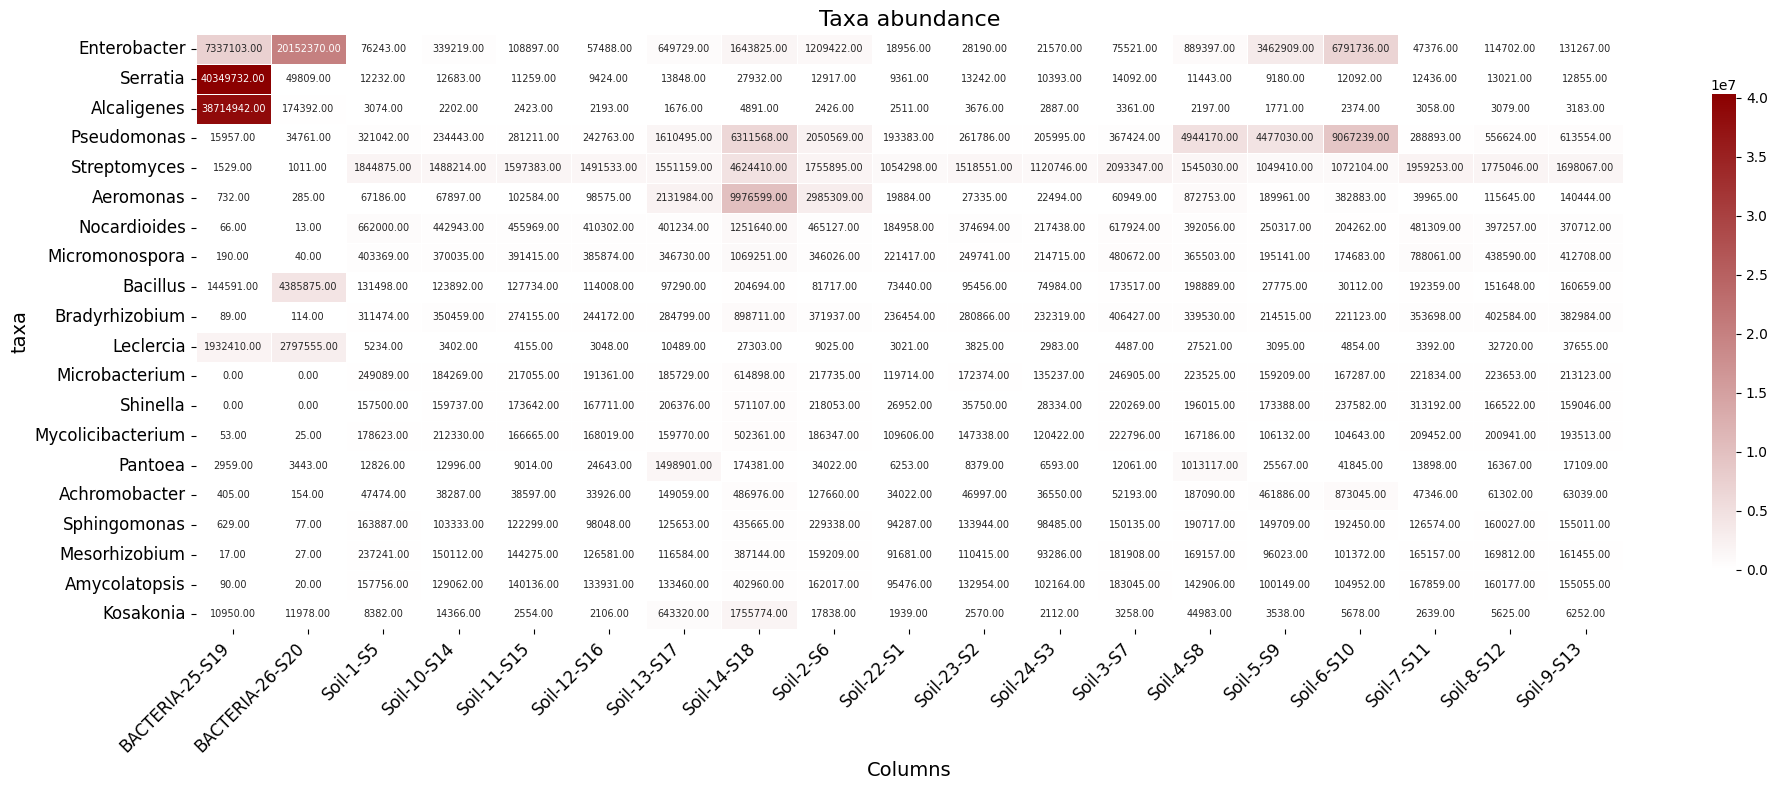

In [9]:
#heatmap with all columns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the custom colormap: white to deep red
cmap = mcolors.LinearSegmentedColormap.from_list('red_white', ['white', 'darkred'])

# Plot the heatmap
plt.figure(figsize=(20, 8))  # Adjust the figure size for cell width and heightV
ax = sns.heatmap(
    hmdf.head(20),
    annot=True,
    cmap=cmap,  # Use the custom colormap
    linewidths=0.5,
    fmt='.2f',
    annot_kws={"size": 7},  # Adjust font size for annotations
    cbar_kws={'shrink': 0.8}  # Optional: Adjust color bar size
)

# Add titles and labels
plt.title('Taxa abundance', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('taxa', fontsize=14)

# Ensure column names are on top and adjust label rotation
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Adjust the aspect ratio of the heatmap
ax.set_aspect('auto')  # Adjust 'auto' or set a specific aspect ratio

# Adjust layout to ensure everything fits
plt.tight_layout()

plt.savefig("output/heatmap.png",bbox_inches="tight")

# Show the plot
plt.show()


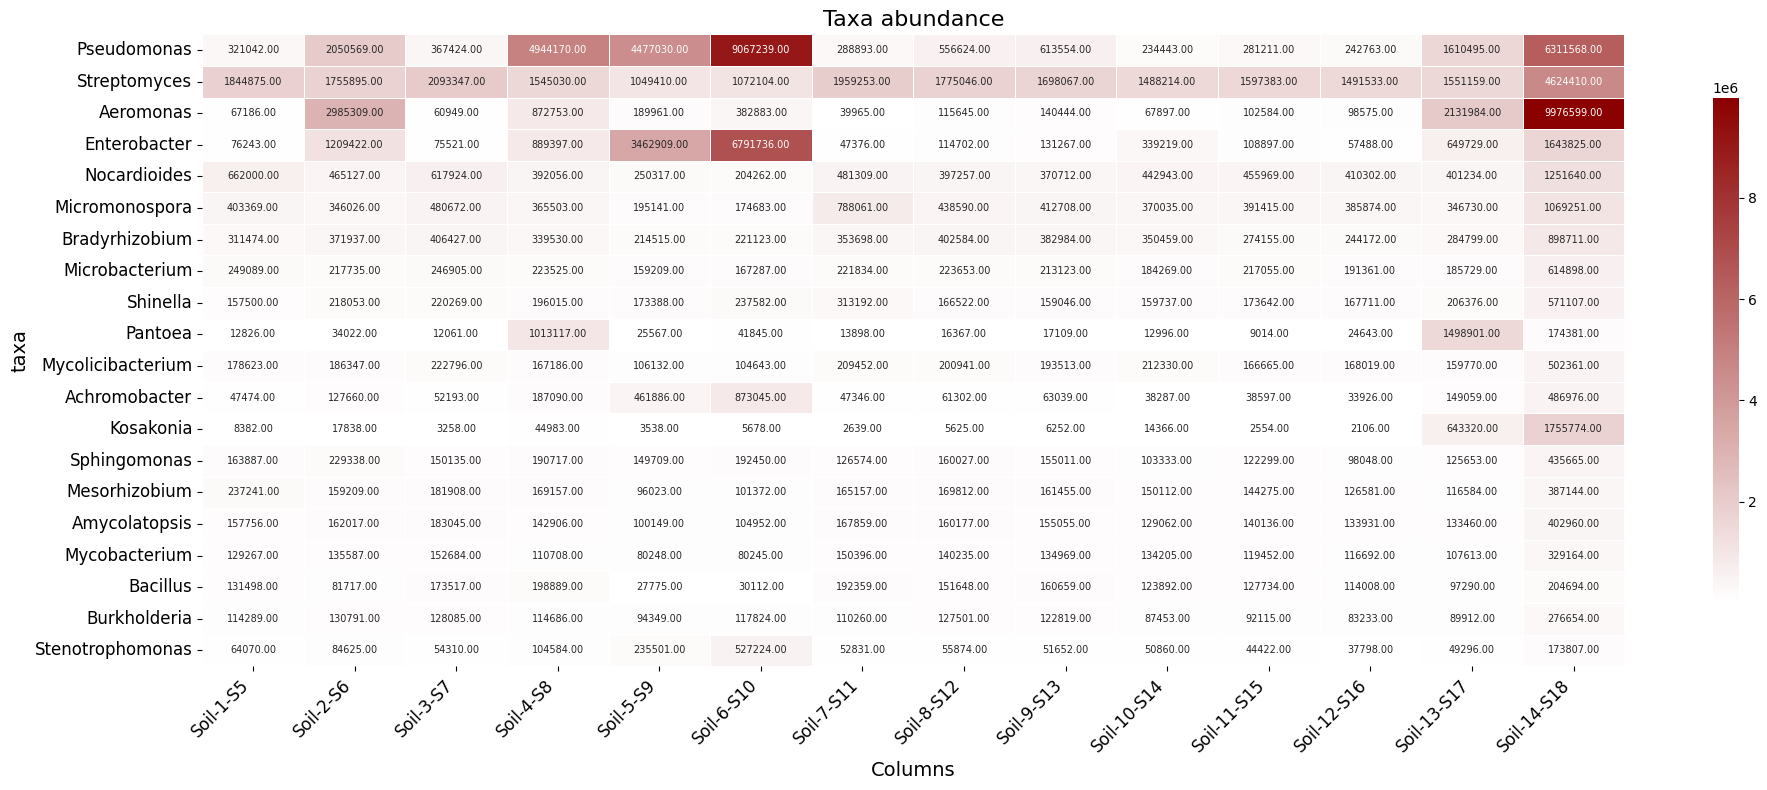

In [14]:

#heatmap excluding b25 and b26

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from natsort import natsorted



# Copy the merged DataFrame
top1 = merged_df.copy()

top1.drop(columns=["BACTERIA-25-S19", "BACTERIA-26-S20"], inplace=True)
top1.drop(columns=["Soil-22-S1","Soil-23-S2","Soil-24-S3"], inplace=True)
top1["sum"] = top1.iloc[:, 2:19].sum(axis=1)

# Sort the DataFrame based on the "sum" column in descending order
top1 = top1.sort_values(by="sum", ascending=False)

# Drop the "sum" column as it's no longer needed
top1.drop(columns="sum", inplace=True)

# Reset the index of the DataFrame
top1.reset_index(drop=True, inplace=True)

# Display the final DataFrame


# Drop the "taxonomy_id" column
hmdf = top1.drop(columns="taxonomy_id")


# Rename the "name" column to "taxa"
hmdf.rename(columns={"name": "taxa"}, inplace=True)

# Set the "taxa" column as the index and drop it from the DataFrame
hmdf.set_index("taxa", drop=True, inplace=True)
hmdf = hmdf[natsorted(hmdf.columns)]


hm =  hmdf.head(20)



# Define the custom colormap: white to deep red
cmap = mcolors.LinearSegmentedColormap.from_list('red_white', ['white', 'darkred'])

# Plot the heatmap
plt.figure(figsize=(20, 8))  # Adjust the figure size for cell width and height
ax = sns.heatmap(
    hm,
    annot=True,
    cmap=cmap,  # Use the custom colormap
    linewidths=0.5,
    fmt='.2f',
    annot_kws={"size": 7},  # Adjust font size for annotations
    cbar_kws={'shrink': 0.8}  # Optional: Adjust color bar size
)

# Add titles and labels
plt.title('Taxa abundance', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('taxa', fontsize=14)

# Ensure column names are on top and adjust label rotation
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Adjust the aspect ratio of the heatmap
ax.set_aspect('auto')  # Adjust 'auto' or set a specific aspect ratio

# Adjust layout to ensure everything fits
plt.tight_layout()
plt.savefig("output/top20taxa.png", bbox_inches="tight")
# Show the plot
plt.show()



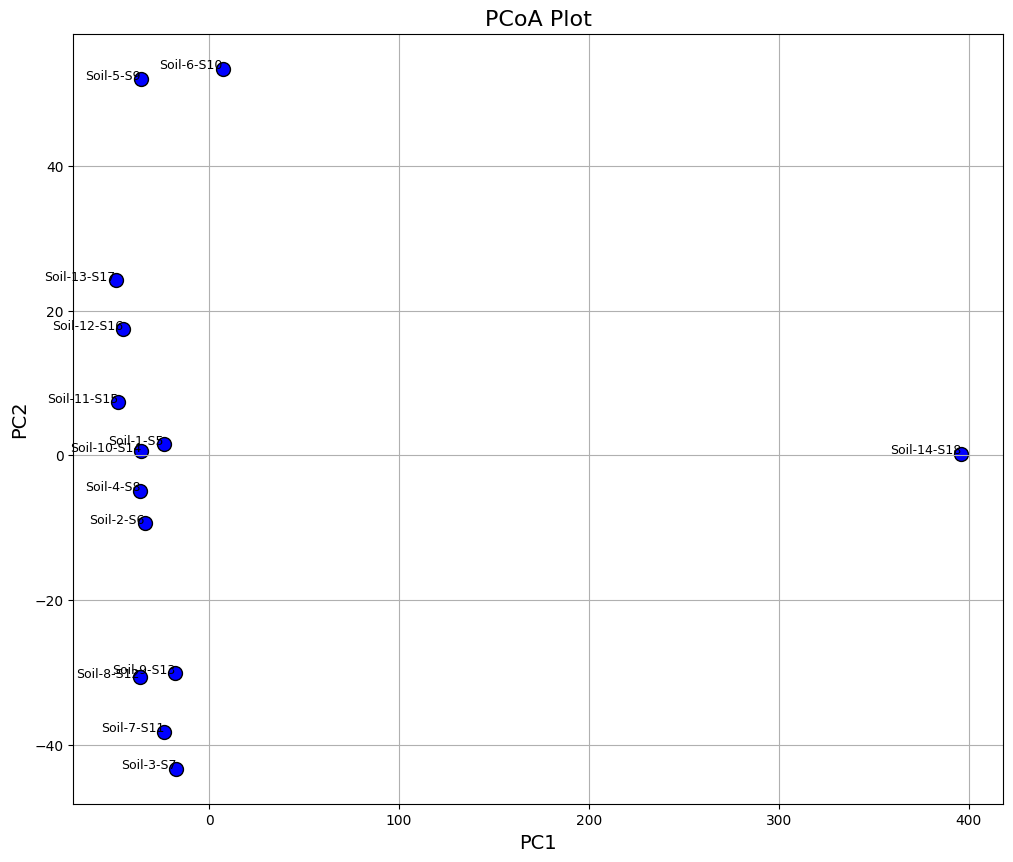

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'top' is your DataFrame
pca = top.drop(columns=["name", "taxonomy_id","BACTERIA-25-S19","BACTERIA-26-S20","Soil-22-S1","Soil-23-S2","Soil-24-S3"])
df_pca = pca.T

# Assuming 'names' is a list or Series containing sample names
# Make sure to extract sample names and ensure they align with your DataFrame
sample_names = df_pca.index.tolist()  # Adjust this if sample names are stored elsewhere

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# Calculate the distance matrix
distance_matrix = pairwise_distances(scaled_data, metric='euclidean')

# Perform PCA on the distance matrix
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
pca_result = pca.fit_transform(distance_matrix)

# Create a DataFrame for plotting
pcoa_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pcoa_df['Sample'] = sample_names  # Add sample names to the DataFrame

# Plot the PCoA results
plt.figure(figsize=(12, 10))
plt.scatter(pcoa_df['PC1'], pcoa_df['PC2'], c='blue', edgecolor='k', s=100)

# Annotate the samples on the plot
for i, txt in enumerate(pcoa_df['Sample']):
    plt.annotate(txt, (pcoa_df['PC1'][i], pcoa_df['PC2'][i]), fontsize=9, ha='right')

# Add titles and labels
plt.title('PCoA Plot', fontsize=16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.grid(True)


# plt.savefig("output/PCA.png", bbox_inches="tight")
# Show the plot
plt.show()


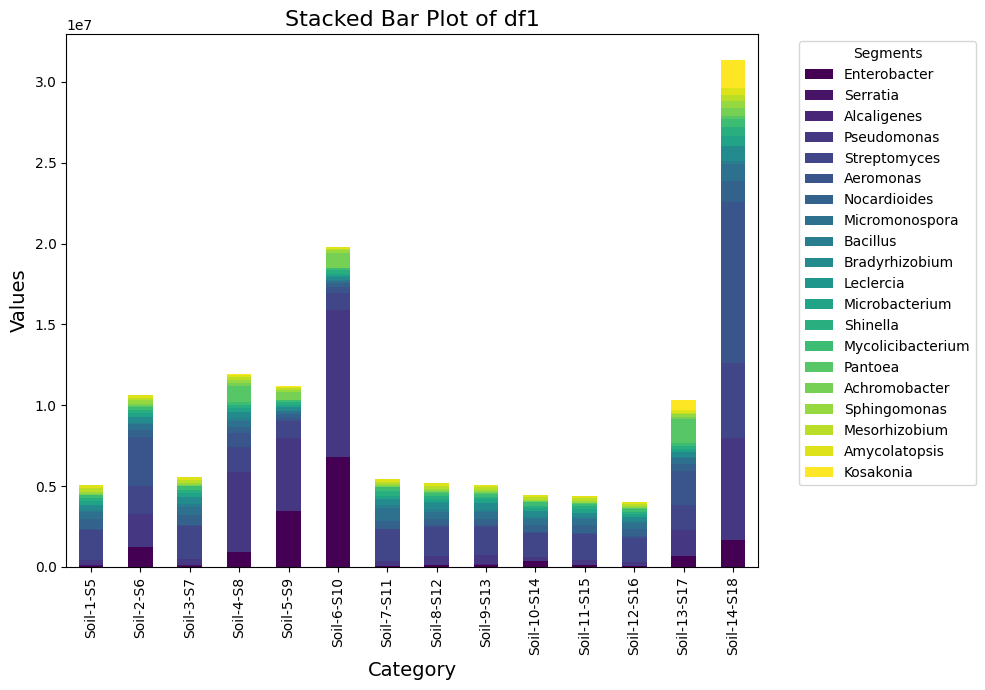

In [40]:

import pandas as pd
import matplotlib.pyplot as plt

# Copy the DataFrame and drop unnecessary columns
bar = top.copy()
bar.drop(columns=["taxonomy_id", "BACTERIA-25-S19", "BACTERIA-26-S20", "Soil-22-S1", "Soil-23-S2", "Soil-24-S3"], inplace=True)

# Rename the 'name' column to 'taxa'
bar.rename(columns={"name": "taxa"}, inplace=True)

# Set the 'taxa' column as the index and keep the first 20 rows
bar.set_index("taxa", inplace=True, drop=True)
bar = bar.head(20)
bar = bar[[
    "Soil-1-S5", "Soil-2-S6", "Soil-3-S7", "Soil-4-S8", "Soil-5-S9", 
    "Soil-6-S10", "Soil-7-S11", "Soil-8-S12", "Soil-9-S13",
    "Soil-10-S14", "Soil-11-S15", "Soil-12-S16", "Soil-13-S17", "Soil-14-S18"
]]
# Transpose the DataFrame to switch rows and columns
df1 = bar.T



# Plotting the stacked bar plot
df1.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

# Add titles and labels
plt.title('Stacked Bar Plot of df1', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Adjust legend position and display the plot
plt.legend(title='Segments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig("output/stacked_barplot.png", bbox_inches="tight")
plt.show()


In [46]:
bacteria = merged_df[['name','BACTERIA-25-S19','BACTERIA-26-S20']]
# Set 'name' as the index
bacteria.set_index('name', inplace=True)

# Apply the condition to filter rows where both columns have values greater than 0
filtered_bacteria = bacteria[(bacteria['BACTERIA-25-S19'] > 0) & (bacteria['BACTERIA-26-S20'] > 0)]

# View the filtered DataFrame
filtered_bacteria['sum'] = filtered_bacteria['BACTERIA-25-S19']+filtered_bacteria['BACTERIA-26-S20']
filtered_bacteria = filtered_bacteria.sort_values(by='sum',ascending=False)
filtered_bacteria.drop(columns="sum", inplace = True)
filtered_bacteria.head(50)




C:\Users\iwin\AppData\Local\Temp\ipykernel_12340\4097499445.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bacteria['sum'] = filtered_bacteria['BACTERIA-25-S19']+filtered_bacteria['BACTERIA-26-S20']


,BACTERIA-25-S19,BACTERIA-26-S20
name,,
Serratia,40349732.0,49809.0
Alcaligenes,38714942.0,174392.0
Enterobacter,7337103.0,20152370.0
Leclercia,1932410.0,2797555.0
Bacillus,144591.0,4385875.0
Delftia,1117.0,966677.0
Klebsiella,390244.0,213139.0
Acinetobacter,1564.0,457830.0
Escherichia,87038.0,140883.0


In [48]:
filtered_bacteria.to_csv("output/bacteria_core.csv")

In [49]:
merged_df.to_csv("output/shotgun.csv")